In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


In [2]:
data = pd.read_csv("cell2cell_cleaned.csv")

In [3]:
data['TotalCallsInOut'] = data['PeakCallsInOut'] + data['OffPeakCallsInOut']
selected = ['CurrentEquipmentDays','RetentionCalls','TotalCallsInOut', 'PercChangeMinutes', 'MonthsInService', 'OverageMinutes', 'CustomerCareCalls', 'MonthlyRevenue','TotalRecurringCharge','MonthlyMinutes', 'CreditRating','MadeCallToRetentionTeam', 'HandsetWebCapable', 'NewCellphoneUser', 'HasCreditCard', 'HandsetRefurbished']
df_selected = data[selected].copy()






In [4]:
df = data[selected +['Churn']]
df.head()

,CurrentEquipmentDays,RetentionCalls,TotalCallsInOut,PercChangeMinutes,MonthsInService,OverageMinutes,CustomerCareCalls,MonthlyRevenue,TotalRecurringCharge,MonthlyMinutes,CreditRating,MadeCallToRetentionTeam,HandsetWebCapable,NewCellphoneUser,HasCreditCard,HandsetRefurbished,Churn
0,361.0,1,82.0,-157.0,61,0.0,0.0,24.00,22.0,219.0,1,1,1,0,1,0,1
1,1504.0,0,6.0,-4.0,58,0.0,0.0,16.99,17.0,10.0,4,0,0,1,1,0,1
2,1812.0,0,5.0,-2.0,60,0.0,0.0,38.00,38.0,8.0,3,0,0,1,1,0,0
3,458.0,0,859.4,157.0,59,0.0,4.3,82.28,75.0,1312.0,4,0,1,1,1,0,0
4,852.0,0,0.0,0.0,53,0.0,0.0,17.14,17.0,0.0,1,0,0,0,1,0,1


# Function for Evaluation

In [5]:
def evaluate_model(y_true, y_pred):

    #print out confusion matrix
    f, axes = plt.subplots(1, 1, figsize=(6, 4))
    sb.heatmap(confusion_matrix(y_true, y_pred), 
              annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.show()

In [6]:
def ROC_AUC_Curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Data Splitting

In [12]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)
threshold = 0.3

In [13]:

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Regression Model

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/minghanqing/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_log_train_proba = logreg.predict_proba(X_train)[:, 1]
y_log_test_proba = logreg.predict_proba(X_test)[:, 1]

Goodness of Fit of Logistic Regression Model: 	Train Dataset
Classification Accuracy 	: 0.7123413541606846
Train FPR: 0.48372560852947094
Train FNR: 0.40838431451208507


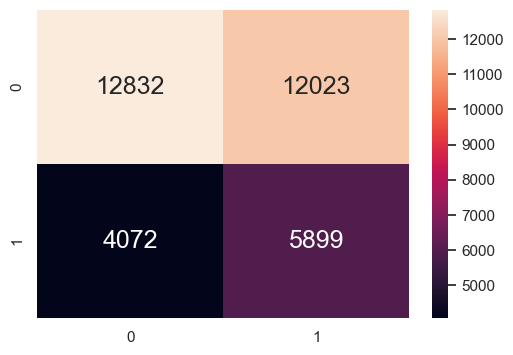

In [16]:
y_log_train_pred = (y_log_train_proba > threshold).astype(int)
cm_train = confusion_matrix(y_train, y_log_train_pred)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)



print("Goodness of Fit of Logistic Regression Model: \tTrain Dataset")
print("Classification Accuracy \t:",logreg.score(X_train,y_train))
print("Train FPR:", FPR_train)
print("Train FNR:", FNR_train)
evaluate_model(y_train, y_log_train_pred)
print()

Goodness of Fit of Logistic Regression Model: 	Test Dataset
Classification Accuracy 	: 0.7125150743668766
Test FPR: 0.4873263236950807
Test FNR: 0.4155357978474497


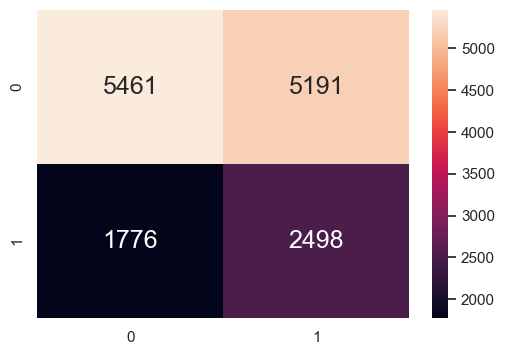

In [17]:
y_log_test_pred = (y_log_test_proba > threshold).astype(int)
cm_test = confusion_matrix(y_test, y_log_test_pred)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)


print("Goodness of Fit of Logistic Regression Model: \tTest Dataset")
print("Classification Accuracy \t:",logreg.score(X_test,y_test))
print("Test FPR:", FPR_test)
print("Test FNR:", FNR_test)
evaluate_model(y_test, y_log_test_pred)
print()

## Feature Importance (Logistic Regression):

In [20]:
logreg_model = pipeline.named_steps['logisticregression']

feature_names = X_train.columns
log_coefficients = logreg_model.coef_[0]

# Combine feature names and coefficients into a DataFrame for easier sorting
log_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_coefficients})

# Sort the coefficients in descending order
log_coefficients_df_sorted = log_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print(log_coefficients_df_sorted)

                    Feature  Coefficient
0      CurrentEquipmentDays     0.249023
7            MonthlyRevenue     0.133736
11  MadeCallToRetentionTeam     0.119772
15       HandsetRefurbished     0.099749
5            OverageMinutes     0.023664
1            RetentionCalls     0.005898
2           TotalCallsInOut    -0.000450
13         NewCellphoneUser    -0.025414
6         CustomerCareCalls    -0.047359
12        HandsetWebCapable    -0.052540
14            HasCreditCard    -0.065034
9            MonthlyMinutes    -0.068464
3         PercChangeMinutes    -0.079203
10             CreditRating    -0.096769
8      TotalRecurringCharge    -0.109873
4           MonthsInService    -0.137693


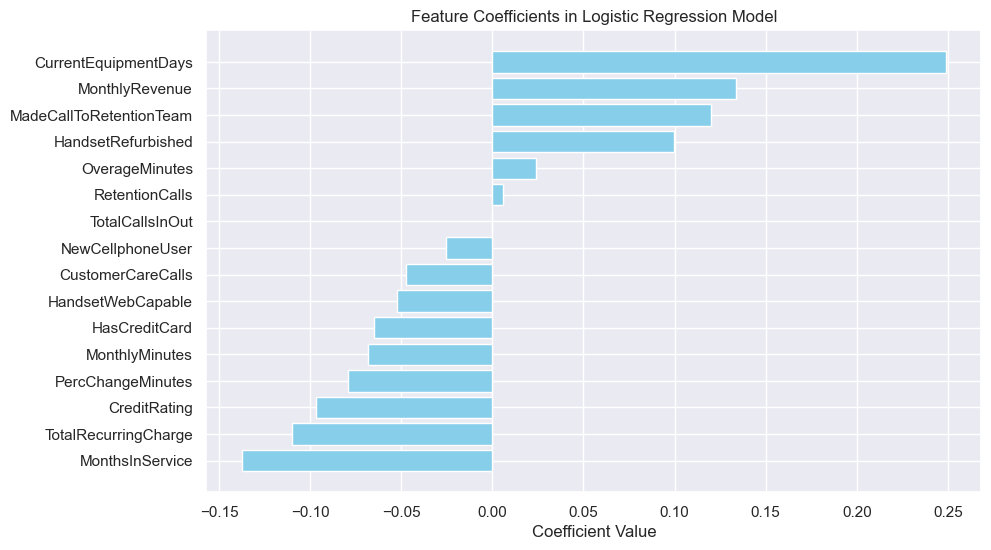

In [21]:


# Plotting the coefficients
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(log_coefficients_df_sorted['Feature'], log_coefficients_df_sorted['Coefficient'], color='skyblue')  # Create a horizontal bar chart
plt.xlabel('Coefficient Value')  # Label the x-axis
plt.title('Feature Coefficients in Logistic Regression Model')  # Set the title
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest coefficient on top
plt.show()  # Show the plot

# Decision Tree

In [22]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

max_depth = 5
min_samples_split = 4
min_samples_leaf = 5

# Create a DecisionTreeClassifier with your specified parameters
dectree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Fit the model on the training data
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4)

In [23]:
y_dec_train_proba = dectree.predict_proba(X_train)[:, 1]
y_dec_test_proba = dectree.predict_proba(X_test)[:, 1]

Classification Accuracy: 0.7188307586286108
Train FPR: 0.34085697042848523
Train FNR: 0.4635442784073814


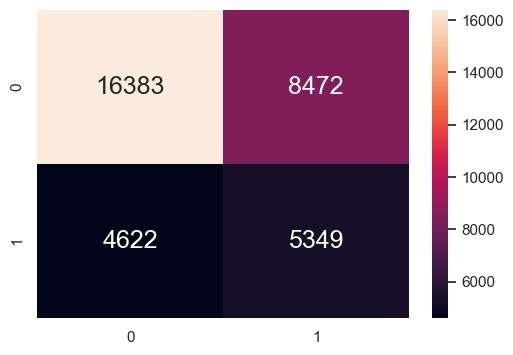

In [24]:
y_dec_train_pred = (y_dec_train_proba > threshold).astype(int)
cm_train = confusion_matrix(y_train, y_dec_train_pred)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)


print("Classification Accuracy:",dectree.score(X_train,y_train))
print("Train FPR:", FPR_train)
print("Train FNR:", FNR_train)
evaluate_model(y_train, y_dec_train_pred)
print()

Classification Accuracy: 0.7173388717673858
Test FPR: 0.3498873450995118
Test FNR: 0.4620963968179691


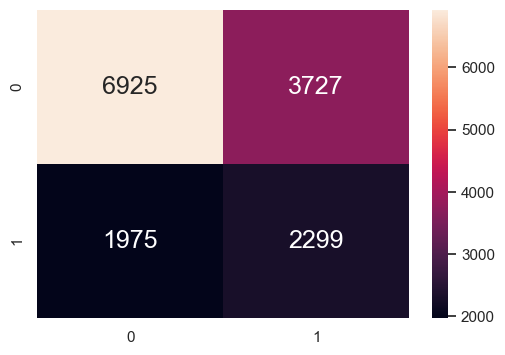

In [25]:
y_dec_test_pred = (y_dec_test_proba > threshold).astype(int)
cm_test = confusion_matrix(y_test, y_dec_test_pred)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)


print("Classification Accuracy:",dectree.score(X_test,y_test))
print("Test FPR:", FPR_test)
print("Test FNR:", FNR_test)
evaluate_model(y_test, y_dec_test_pred)
print()

## Feature Importance (Decision Tree):

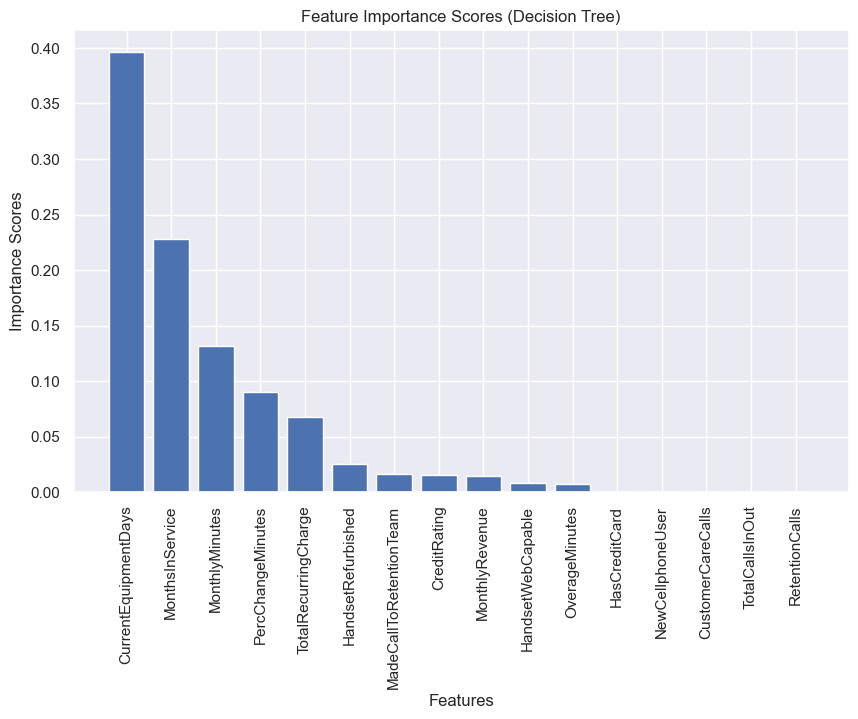

In [27]:
dec_feature_importances = dectree.feature_importances_

# Sort feature importance scores and corresponding feature names
dec_sorted_indices = dec_feature_importances.argsort()[::-1]
dec_sorted_feature_importances = dec_feature_importances[dec_sorted_indices]
dec_sorted_feature_names = [X.columns[i] for i in dec_sorted_indices]

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(dec_sorted_feature_importances)), dec_sorted_feature_importances, tick_label=dec_sorted_feature_names)
plt.title('Feature Importance Scores (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()

In [29]:
for feature, importance in zip(dec_sorted_feature_names, dec_sorted_feature_importances):
    print(f"Feature: {feature}, Importance Score: {importance}")

Feature: CurrentEquipmentDays, Importance Score: 0.39625084757423223
Feature: MonthsInService, Importance Score: 0.2276826503437521
Feature: MonthlyMinutes, Importance Score: 0.1313358600918284
Feature: PercChangeMinutes, Importance Score: 0.09003742632032126
Feature: TotalRecurringCharge, Importance Score: 0.0675414313276589
Feature: HandsetRefurbished, Importance Score: 0.024913259869929497
Feature: MadeCallToRetentionTeam, Importance Score: 0.0159011087158604
Feature: CreditRating, Importance Score: 0.015676515828280113
Feature: MonthlyRevenue, Importance Score: 0.014761103485975122
Feature: HandsetWebCapable, Importance Score: 0.008434317110686556
Feature: OverageMinutes, Importance Score: 0.007465479331475504
Feature: HasCreditCard, Importance Score: 0.0
Feature: NewCellphoneUser, Importance Score: 0.0
Feature: CustomerCareCalls, Importance Score: 0.0
Feature: TotalCallsInOut, Importance Score: 0.0
Feature: RetentionCalls, Importance Score: 0.0


# Random Forest

Train Accuracy 0.7427496697869408
Train FPR: 0.3334942667471334
Train FNR: 0.25373583391836324


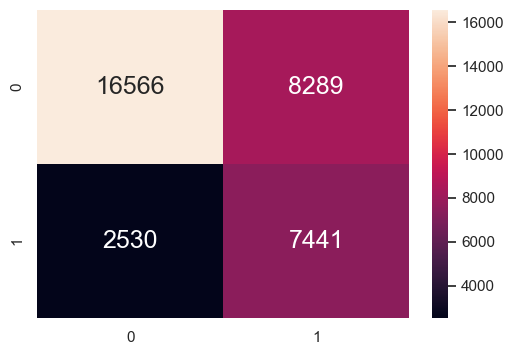

Test Accuracy: 0.7206217338871768
Test FPR: 0.3933533608711979
Test FNR: 0.3710809546092653


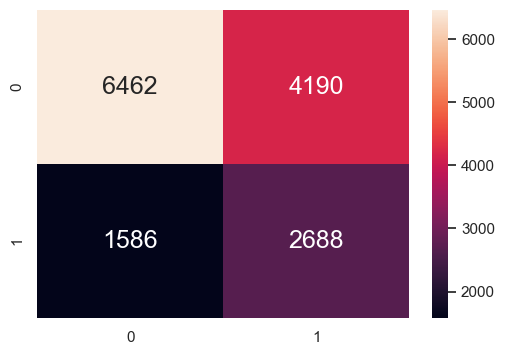

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

rf_classifier = RandomForestClassifier(n_estimators=150,  
                                       max_depth=11,       
                                       min_samples_split=4,  
                                       min_samples_leaf=5,   
                                       random_state=42)



rf_classifier.fit(X_train, y_train)  

y_RF_train_proba = rf_classifier.predict_proba(X_train)[:, 1]

y_RF_test_proba = rf_classifier.predict_proba(X_test)[:, 1]


threshold = 0.3
y_RF_train_pred = (y_RF_train_proba > threshold).astype(int)
y_RF_test_pred = (y_RF_test_proba > threshold).astype(int)


cm_train = confusion_matrix(y_train, y_RF_train_pred)
cm_test = confusion_matrix(y_test, y_RF_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# Train:
FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)
print("Train Accuracy", rf_classifier.score(X_train, y_train))
print("Train FPR:", FPR_train)
print("Train FNR:", FNR_train)
evaluate_model(y_train, y_RF_train_pred)


#Test:
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)
print("Test Accuracy:", rf_classifier.score(X_test, y_test))
print("Test FPR:", FPR_test)
print("Test FNR:", FNR_test)
evaluate_model(y_test, y_RF_test_pred)


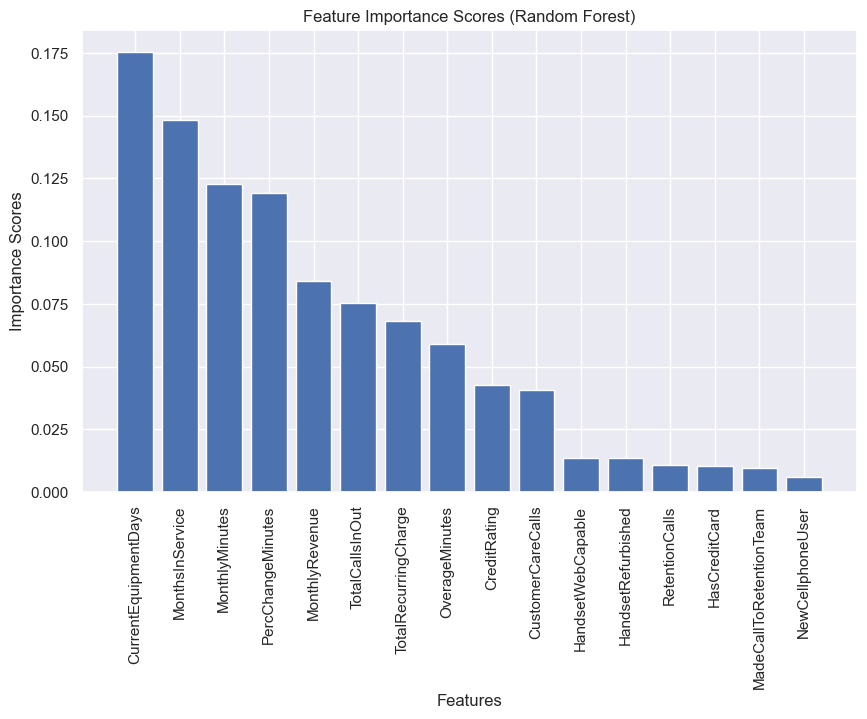

In [31]:
rf_feature_importances = rf_classifier.feature_importances_

# Sort feature importance scores and corresponding feature names
rf_sorted_indices = rf_feature_importances.argsort()[::-1]
rf_sorted_feature_importances = rf_feature_importances[rf_sorted_indices]
rf_sorted_feature_names = [X.columns[i] for i in rf_sorted_indices]

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_sorted_feature_importances)), rf_sorted_feature_importances, tick_label=rf_sorted_feature_names)
plt.title('Feature Importance Scores (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()



In [32]:
for feature, importance in zip(rf_sorted_feature_names, rf_sorted_feature_importances):
    print(f"Feature: {feature}, Importance Score: {importance}")

Feature: CurrentEquipmentDays, Importance Score: 0.17530211408708887
Feature: MonthsInService, Importance Score: 0.14839705685868573
Feature: MonthlyMinutes, Importance Score: 0.12257730431333319
Feature: PercChangeMinutes, Importance Score: 0.11902063724314725
Feature: MonthlyRevenue, Importance Score: 0.08409482266193563
Feature: TotalCallsInOut, Importance Score: 0.07554583928337744
Feature: TotalRecurringCharge, Importance Score: 0.06813249812179153
Feature: OverageMinutes, Importance Score: 0.05910227545528108
Feature: CreditRating, Importance Score: 0.042818838668728286
Feature: CustomerCareCalls, Importance Score: 0.040620173649367194
Feature: HandsetWebCapable, Importance Score: 0.013699084994147785
Feature: HandsetRefurbished, Importance Score: 0.013634196549571537
Feature: RetentionCalls, Importance Score: 0.010720899209742759
Feature: HasCreditCard, Importance Score: 0.010510866222503487
Feature: MadeCallToRetentionTeam, Importance Score: 0.009703773199838218
Feature: NewCel

## Grid Search (Our attempt to use grid search but failed...):

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X = df.drop(columns=['Churn'])
y = df['Churn']

# Define the model
model = RandomForestClassifier()

# Define hyperparameters grid for grid search
param_grid = {
    'n_estimators': [ 100, 300, 500, 700, 800, 900],
    'max_depth': [ 5, 10, 15, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Print best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)